# ⭐Imports


In [1]:
from FUNCTIONS import *
%matplotlib inline

TensorFlow Version:  2.4.1


---

In [31]:
data_s.shape[0]/40

387630.075

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data_s_500k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_500k').iloc[:, 1:])

# Slice & Save
events_no = int(300000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

Total Events: 600000
Total Labels: 600000
Shape:  (600000, 40, 40, 1)
 
Train:  (418200, 40, 40, 1) (418200,)
Val:  (91800, 40, 40, 1) (91800,)
Test:  (90000, 40, 40, 1) (90000,)
 
<TensorSliceDataset shapes: ((40, 40, 1), ()), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((40, 40, 1), ()), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((40, 40, 1), ()), types: (tf.float64, tf.float64)>
<PrefetchDataset shapes: ((64, 40, 40, 1), (64,)), types: (tf.int64, tf.int64)>

train, val, test:  6534 1434 1406


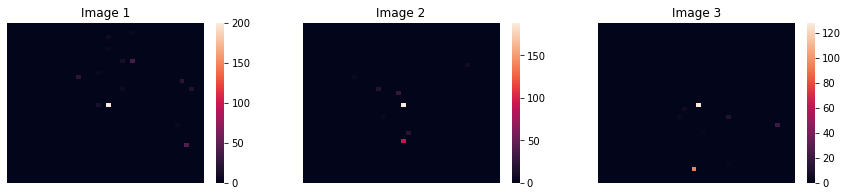

In [3]:
batch_size=64
train_batches, val_batches, test_batches, num_of_batches_train, num_of_batches_val, num_of_batches_test = preprocess_ML_tf(data_s, data_b, batch_size=batch_size)

In [ ]:
model.summary()

In [12]:
input_shape=(40, 40, 1)
kernel_size = 3
padding='valid'
activation = 'relu'

paddings = ['valid']


for padding in paddings:

    model = tf.keras.Sequential([
              tf.keras.Input(shape=input_shape),
              tf.keras.layers.Conv2D(16, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(32, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=activation),
              tf.keras.layers.Dense(2, activation = 'softmax')
    ])


    # Compile Model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    
    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta = 0.001)
    save_best = tf.keras.callbacks.ModelCheckpoint('./model_recent.h5', monitor='loss', save_best_only=True)

    print('\n\n', activation, '\n')

    # Fit model to training data
    EPOCHS = 20

    history = model.fit(train_batches, 
              epochs=EPOCHS,
              callbacks= [early_stopping, save_best],
              validation_data=val_batches, 
              verbose=1
              )
    
    loss, accuracy = model.evaluate(test_batches, verbose=0)

    print('\nLoss on the Test Set: {:,.3f}'.format(loss))
    print('Accuracy on the Test Set: {:.1%}'.format(accuracy))



 relu 

Epoch 1/20
6534/6534 [==============================] - 452s 69ms/step - loss: 0.5888 - accuracy: 0.7241 - val_loss: 0.4959 - val_accuracy: 0.7629
Epoch 2/20
6534/6534 [==============================] - 447s 68ms/step - loss: 0.4964 - accuracy: 0.7619 - val_loss: 0.4962 - val_accuracy: 0.7631
Epoch 3/20
6534/6534 [==============================] - 442s 68ms/step - loss: 0.4888 - accuracy: 0.7667 - val_loss: 0.4845 - val_accuracy: 0.7684
Epoch 4/20
6534/6534 [==============================] - 444s 68ms/step - loss: 0.4851 - accuracy: 0.7680 - val_loss: 0.4873 - val_accuracy: 0.7675
Epoch 5/20
6534/6534 [==============================] - 445s 68ms/step - loss: 0.4802 - accuracy: 0.7714 - val_loss: 0.4850 - val_accuracy: 0.7681
Epoch 6/20
6534/6534 [==============================] - 433s 66ms/step - loss: 0.4792 - accuracy: 0.7716 - val_loss: 0.4860 - val_accuracy: 0.7684
Epoch 7/20
6534/6534 [==============================] - 424s 65ms/step - loss: 0.4762 - accuracy: 0.7734 - v

[[0.748408   0.251592  ]
 [0.20972949 0.79027051]]


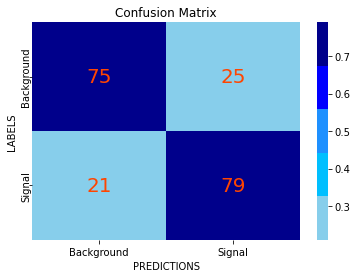

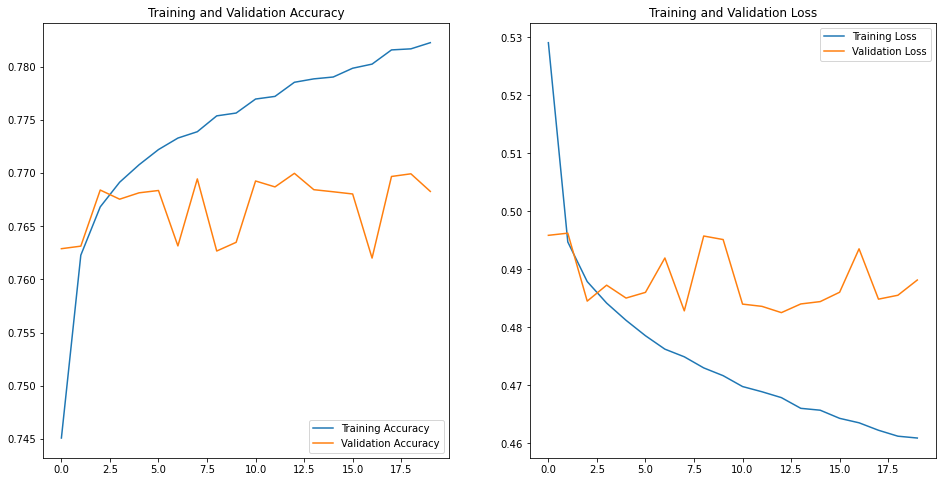

In [13]:
model0 = tf.keras.models.load_model('model_recent.h5')
models = [model0]
cmx_tf(models, test_batches, num_of_batches_test)
model_complexity_graph(history)

In [6]:
input_shape=(40, 40, 1)
kernel_size = 3
padding='valid'
activation = 'relu'

paddings = ['valid']


for padding in paddings:

    model = tf.keras.Sequential([
              tf.keras.Input(shape=input_shape),
              tf.keras.layers.Conv2D(16, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(32, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(2, activation = 'softmax')
    ])


    # Compile Model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    
    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta = 0.001)
    save_best = tf.keras.callbacks.ModelCheckpoint('./model_recent.h5', monitor='loss', save_best_only=True)

    print('\n\n', activation, '\n')

    # Fit model to training data
    EPOCHS = 20

    history = model.fit(train_batches, 
              epochs=EPOCHS,
              callbacks= [early_stopping, save_best],
              validation_data=val_batches, 
              verbose=1
              )
    
    loss, accuracy = model.evaluate(test_batches, verbose=0)

    print('\nLoss on the Test Set: {:,.3f}'.format(loss))
    print('Accuracy on the Test Set: {:.1%}'.format(accuracy))



 relu 

Epoch 1/20
6534/6534 [==============================] - 592s 90ms/step - loss: 0.6323 - accuracy: 0.7019 - val_loss: 0.5161 - val_accuracy: 0.7570
Epoch 2/20
6534/6534 [==============================] - 592s 91ms/step - loss: 0.5135 - accuracy: 0.7540 - val_loss: 0.5092 - val_accuracy: 0.7566
Epoch 3/20
6534/6534 [==============================] - 584s 89ms/step - loss: 0.5053 - accuracy: 0.7587 - val_loss: 0.5171 - val_accuracy: 0.7645
Epoch 4/20
6534/6534 [==============================] - 583s 89ms/step - loss: 0.5015 - accuracy: 0.7617 - val_loss: 0.5026 - val_accuracy: 0.7643
Epoch 5/20
6534/6534 [==============================] - 587s 90ms/step - loss: 0.4986 - accuracy: 0.7619 - val_loss: 0.5030 - val_accuracy: 0.7649
Epoch 6/20
6534/6534 [==============================] - 586s 90ms/step - loss: 0.4967 - accuracy: 0.7639 - val_loss: 0.5134 - val_accuracy: 0.7660
Epoch 7/20
6534/6534 [==============================] - 584s 89ms/step - loss: 0.4969 - accuracy: 0.7637 - v

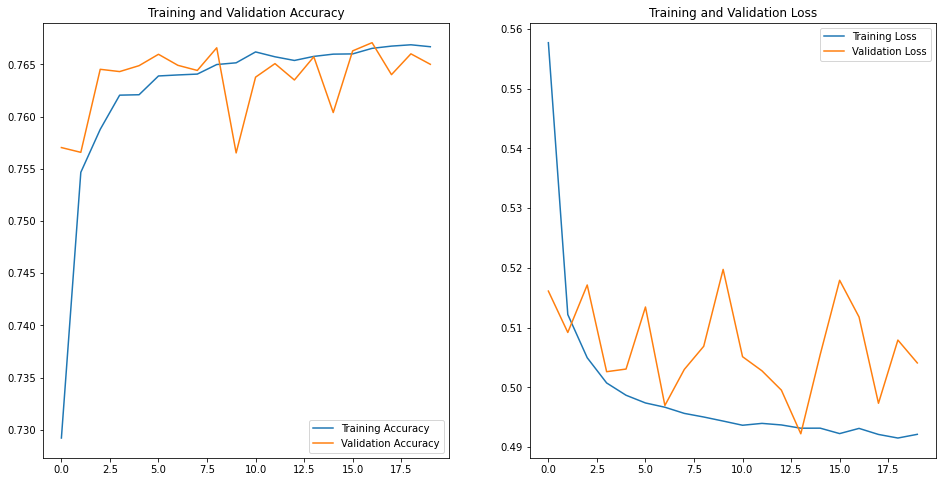

In [9]:
model_complexity_graph(history)

#### 🔴 Confusion Matrix & ROC Curve (unseen test data)

Note ROC: For relu activation function (i.e. model outputs two probabilities per event, [P(background), P(signal)]

In [7]:
model0 = tf.keras.models.load_model('model_recent.h5')
models = [model0]
cmx_tf(models, test_batches, num_of_batches_test)
model_complexity_graph(history)

In [10]:
def cmx_tf(models, test_batches, num_of_batches_test):
    
    '''
    Plots Confusion Matrix for TensorFlow list of models
    
    '''
    
    for model in models:
    
        '''Extract Preds & Labels'''

        preds_all = []
        labels_all = []
        preds_batch = []
        labels_batch = []


        # For all batches
        for batch, labels in test_batches.take(num_of_batches_test):

            # 64 preds and labels added to list
            pp = model.predict(batch)
            preds_batch = np.array([np.argmax(pp[i]) for i in range(len(pp))])
            labels_batch = labels.numpy()

            preds_all.append(preds_batch)
            labels_all.append(labels_batch)


        # Convert list of lists to ndarray and flatten to get 1D ndarray of all preds and 1D ndarray of all labels
        preds = np.array(preds_all).flatten()
        labels = np.array(labels_all).flatten()      


        '''Build CMX'''

        cmx_non_normal = tf.math.confusion_matrix(labels, preds).numpy() # Create Confusion Matrix
        cmx0 = cmx_non_normal[0] / cmx_non_normal[0].sum()
        cmx1 = cmx_non_normal[1] / cmx_non_normal[1].sum()
        cmx = np.stack((cmx0, cmx1), axis=0)
        print(cmx)

        # Plot confusion matrix
        fig, ax = plt.subplots()
        sns.heatmap(cmx, cmap=['skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'darkblue'])

        # xylabels and title
        plt.title('Confusion Matrix')
        plt.xlabel('PREDICTIONS')
        plt.ylabel('LABELS')

        # Label ticks
        ax.set_xticklabels(['Background', 'Signal'])
        ax.set_yticklabels(['Background', 'Signal'])
        # Align ticks
        plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
                 rotation_mode="anchor")

        # Text Annotations for Blocks in CMX
        for i in range(2):
            for j in range(2):

                value = int(np.round(100*cmx[i, j], 0))

                text = ax.text(j+0.5, 
                               i+0.5, 
                               value,
                               ha="center", 
                               va="center", 
                               color="orangered", 
                               fontsize = 20)

        plt.show()

[[0.78554789 0.21445211]
 [0.25345684 0.74654316]]


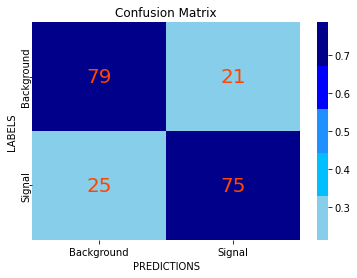

In [11]:
cmx_tf(models, test_batches, num_of_batches_test)

In [ ]:
cmx_tf(models, test_batches, num_of_batches_test)

In [ ]:
ROC3_tf(model0, model1, model2, test_batches, num_of_batches_test)

---

---

---

---

---

---

---

---

# 🔵 Build the Model

### 🔴 Learning Curve (underfitting test)
Determine whether a larger dataset could improve performance



 0.1 

Accuracy on the Test Set: 74.0%


 0.2 

Accuracy on the Test Set: 74.2%


 0.4 

Accuracy on the Test Set: 74.5%


 0.6 

Accuracy on the Test Set: 75.5%


 0.8 

Accuracy on the Test Set: 73.6%


 1 

Accuracy on the Test Set: 75.6%


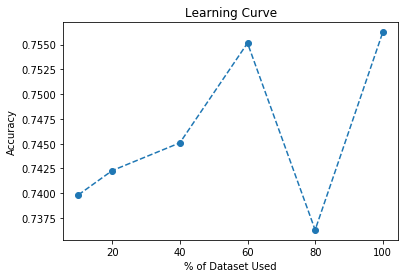

In [5]:
learning_curve(train_batches, val_batches, test_batches, num_of_batches_train, num_of_batches_val)

### 🔴 Train Model (with Hyperparameter Tuning)

In [24]:
input_shape=(40, 40, 1)
kernel_size = 3
padding='valid'
activation = 'relu'


for padding in paddings:

    model = tf.keras.Sequential([
              tf.keras.Input(shape=input_shape),
              tf.keras.layers.Conv2D(16, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(32, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Conv2D(64, kernel_size=kernel_size, padding=padding, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.MaxPooling2D(),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(128, activation=activation),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(2, activation = 'softmax')
    ])


    # Compile Model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    
    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta = 0.001)
    save_best = tf.keras.callbacks.ModelCheckpoint('./model_recent.h5', monitor='loss', save_best_only=True)

    print('\n\n', activation, '\n')

    # Fit model to training data
    EPOCHS = 20

    history = model.fit(train_batches, 
              epochs=EPOCHS,
              callbacks= [early_stopping, save_best],
              validation_data=val_batches, 
              verbose=1
              )
    
    loss, accuracy = model.evaluate(test_batches, verbose=0)

    print('\nLoss on the Test Set: {:,.3f}'.format(loss))
    print('Accuracy on the Test Set: {:.1%}'.format(accuracy))



 relu 

Epoch 1/20
2178/2178 [==============================] - 219s 100ms/step - loss: 0.6881 - accuracy: 0.6848 - val_loss: 0.5539 - val_accuracy: 0.7330
Epoch 2/20
 239/2178 [==>...........................] - ETA: 3:10 - loss: 0.5433 - accuracy: 0.7395

KeyboardInterrupt: 

[[0.71931803 0.28068197]
 [0.18335798 0.81664202]]


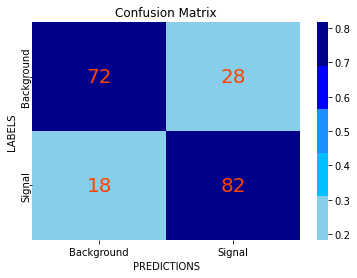

In [23]:
def cmx_tf(models, test_batches, num_of_batches_test):
    
    '''
    Plots Confusion Matrix for TensorFlow list of models
    
    '''
    
    for model in models:
    
        '''Extract Preds & Labels'''

        preds_all = []
        labels_all = []
        preds_batch = []
        labels_batch = []


        # For all batches
        for batch, labels in test_batches.take(num_of_batches_test):

            # 64 preds and labels added to list
            pp = model.predict(batch)
            preds_batch = np.array([np.argmax(pp[i]) for i in range(len(pp))])
            labels_batch = labels.numpy()

            preds_all.append(preds_batch)
            labels_all.append(labels_batch)


        # Convert list of lists to ndarray and flatten to get 1D ndarray of all preds and 1D ndarray of all labels
        preds = np.array(preds_all).flatten()
        labels = np.array(labels_all).flatten()      


        '''Build CMX'''

        cmx_non_normal = tf.math.confusion_matrix(labels, preds).numpy() # Create Confusion Matrix
        cmx0 = cmx_non_normal[0] / cmx_non_normal[0].sum()
        cmx1 = cmx_non_normal[1] / cmx_non_normal[1].sum()
        cmx = np.stack((cmx0, cmx1), axis=0)
        
        print(cmx)


        # Plot confusion matrix
        fig, ax = plt.subplots()
        sns.heatmap(cmx, cmap=['skyblue', 'deepskyblue', 'dodgerblue', 'blue',  'darkblue'])

        # xylabels and title
        plt.title('Confusion Matrix')
        plt.xlabel('PREDICTIONS')
        plt.ylabel('LABELS')

        # Label ticks
        ax.set_xticklabels(['Background', 'Signal'])
        ax.set_yticklabels(['Background', 'Signal'])
        # Align ticks
        plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
                 rotation_mode="anchor")
        plt.setp(ax.get_yticklabels(), rotation=90, ha="center",
                 rotation_mode="anchor")

        # Text Annotations for Blocks in CMX
        for i in range(2):
            for j in range(2):

                value = int(np.round(100*cmx[i, j], 0))

                text = ax.text(j+0.5, 
                               i+0.5, 
                               value,
                               ha="center", 
                               va="center", 
                               color="orangered", 
                               fontsize = 20)

        plt.show()
        
cmx_tf(models, test_batches, num_of_batches_test)

In [22]:
modelll = tf.keras.models.load_model('model_relu_7380.h5')
models = [model]

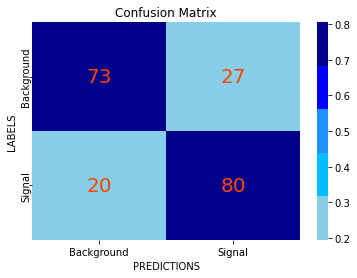

In [13]:
model0 = tf.keras.models.load_model('model_recent.h5')
# model1 = tf.keras.models.load_model('model_tanh_7360.h5')
# model2 = tf.keras.models.load_model('model_relu_7570.h5')

models = [model0]

cmx_tf(models, test_batches, num_of_batches_test)

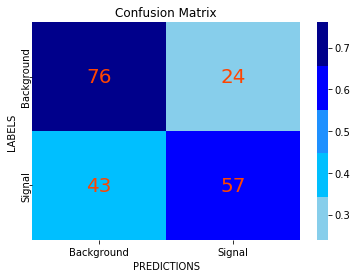

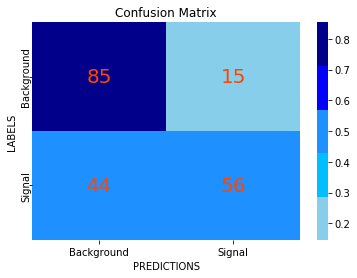

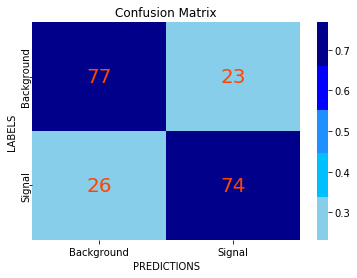

In [10]:
model0 = tf.keras.models.load_model('model_recent.h5')
model1 = tf.keras.models.load_model('model_tanh_7360.h5')
model2 = tf.keras.models.load_model('model_relu_7570.h5')

models = [model0, model1, model2]

cmx_tf(models, test_batches, num_of_batches_test)

#### 🔴 Model-Complexity Graph 

How performance changes with epochs

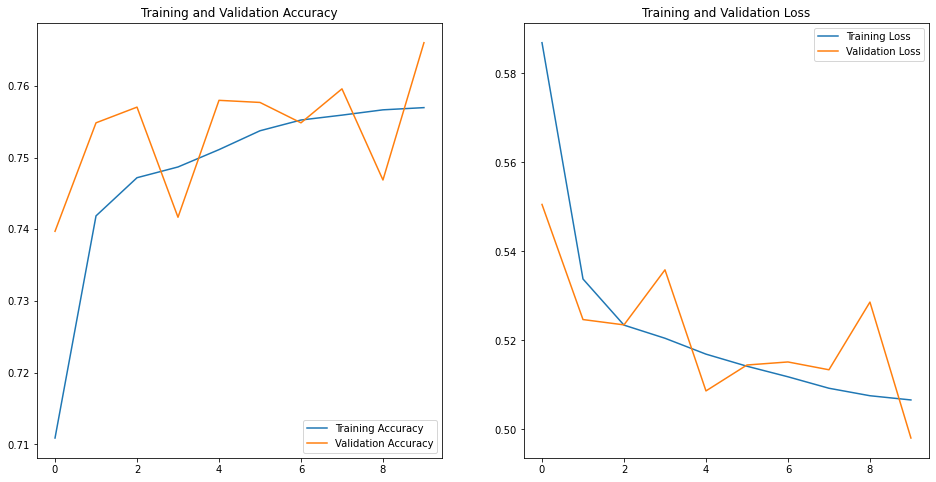

In [14]:
model_complexity_graph(history)

#### 🔴 Evaluate Model

In [ ]:
model = tf.keras.models.load_model('model_relu_7570.h5')
#model.summary()

loss, accuracy = model.evaluate(test_batches, verbose=0)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.1%}'.format(accuracy))

#### 🔴 Visualise Predictions

In [ ]:
visualise_preds(model, test_batches)